In [1]:
# import Python modules for scientific computing and plotting 
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# import the CosmoBolognaLib
import CosmoBolognaLib as cbl
from CosmoBolognaLib import Data1DPtrVector as dv

In [3]:
# set the CosmoBolognaLib and the current directories
cbl.SetDirs(os.getcwd()+"/../../", os.getcwd()+"/")

In [4]:
#Define some dataset 

cosmology = cbl.Cosmology(cbl.CosmologicalModel__Planck15_)
redshift  = 1.
bias = 1.5
nObjects = 1.e7
Area = 15000
Volume = cosmology.Volume(0.9, 1.1, Area)

rMin = 40.
rMax = 150.
nBins = 20
binType = cbl.BinType__linear_
methodPk = "CAMB"
sigma_NL = 0.

xi_multipoles = cbl.generate_mock_2PCF_multipoles (cosmology, bias, nObjects, Volume, redshift,\
                                                   rMin, rMax, nBins, binType, methodPk, sigma_NL, False)

In [5]:
#Define correlated measures
nExtractions = 200
seed = 666
corr_data = np.array(cbl.generate_correlated_data (nExtractions, xi_multipoles.data(), xi_multipoles.covariance(), seed))

#convert to dataset
covariance_meas = np.cov(corr_data.T)

In [6]:
# This constructor reads in the **EXACT** covariance matrix
covmat = cbl.CovarianceMatrix(xi_multipoles.covariance())

In [7]:
# This constructor reads in the **MEASURED** covariance matrix
covmat_meas = cbl.CovarianceMatrix(covariance_meas, nExtractions)

In [8]:
# This constructor creat a tapered covariance matrix, from an input covariance matrix
tapering_factor = 60
covmat_tapered = cbl.TaperedCovarianceMatrix(tapering_factor, covmat_meas)

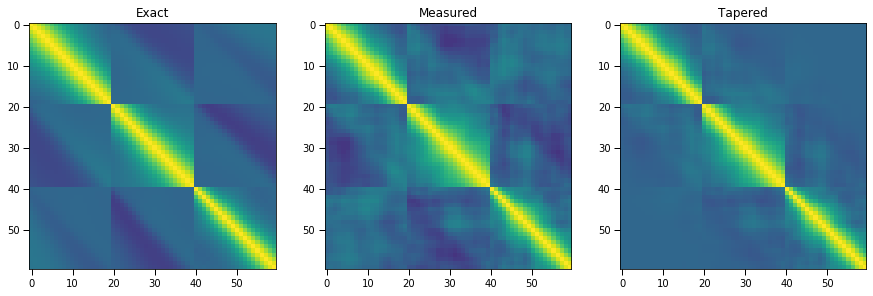

In [9]:
#Plot the correlation matrices

figure, ax = plt.subplots(1, 3, figsize=(15, 5))

vmin, vmax = -0.5, 1

ax[0].set_title("Exact")
ax[0].imshow(covmat.correlation(), vmax=vmax, vmin=vmin)

ax[1].set_title("Measured")
ax[1].imshow(covmat_meas.correlation(), vmax=vmax, vmin=vmin)

ax[2].set_title("Tapered")
ax[2].imshow(covmat_tapered.correlation(), vmax=vmax, vmin=vmin)

In [10]:
covmat += covmat_meas